## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [2]:
df = yf.download('GOOGL', start='2004-08-19', end=datetime.now())
# df.columns = df.columns.droplevel(1)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [4]:
df.columns = df.columns.get_level_values(0)

In [5]:
df.reset_index(inplace=True)

In [6]:
df.duplicated().sum()

0

## Copying the dataset for future use

In [7]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [9]:
df.drop(['Adj Close'], axis=1, inplace=True)

### Splitting into features and target

In [10]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [12]:
# X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Linear Regression

In [13]:
lr = LinearRegression()
start = time.time()
lr.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 0.02337956428527832


In [14]:
lr.score(X_train, y_train)

0.9999209642576777

In [15]:
predicted = lr.predict(X_test)
predicted

array([117.54801373,  12.04469383,  11.91775382, ...,  11.36976798,
        12.16604482,   7.12883352])

In [16]:
y_test

,Close
4522,117.470001
586,12.065065
553,11.891892
227,7.529780
1321,14.421421
...,...
3893,73.798500
1433,13.313313
1018,11.267768
582,12.114865


In [17]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,2.596598
2004-09-07 00:00:00+00:00,2.542042,2.529913
2004-09-14 00:00:00+00:00,2.790040,2.771906
2004-09-16 00:00:00+00:00,2.852102,2.873958
2004-09-22 00:00:00+00:00,2.962462,2.981235
...,...,...
2024-10-21 00:00:00+00:00,164.070007,164.007679
2024-11-11 00:00:00+00:00,180.350006,180.148166
2024-11-14 00:00:00+00:00,175.580002,175.528708


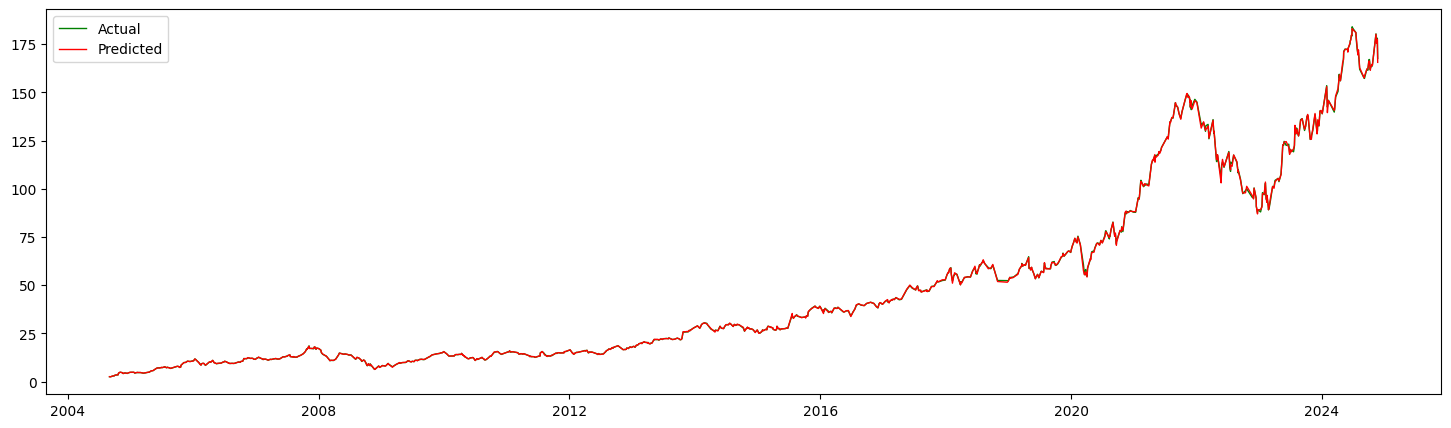

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

In [19]:
lr.predict(scaler.transform([[165.86, 167.65, 165.24, 3621520]]))

array([167.97589151])

In [20]:
df1[df1.Date == '2004-09-01']

Price,index,Date,Adj Close,Close,High,Low,Open,Volume
9,9,2004-09-01 00:00:00+00:00,2.502562,2.508759,2.576827,2.494244,2.57007,182765052


In [21]:
lr.predict(scaler.transform([[2.57007, 2.576827, 2.494244, 182765052]]))

array([2.63410842])

## Calculating the Performance Evaluation Metrics

In [22]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.16847549216123292
Root Mean Squared Error: 0.41045766183765275
Mean Absolute Error: 0.21806474554453215
